In [86]:
import numpy as np
import pandas as pd
from config_ihdp import args

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

%load_ext autoreload
%autoreload 2

from sklearn.linear_model import LogisticRegression

# from miwae import miwae
# from metrics import tau_dr, tau_ols, tau_ols_ps
# from generate_data import gen_lrmf, ampute, gen_dlvm
l_tau = ['tau_dr', 'tau_ols', 'tau_ols_ps', 'mul_tau_dr', 'mul_tau_ols', 'mul_tau_ols_ps']

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [87]:
from baseline import *

## Choose metric

In [88]:
loss = 'tau_dr'

save_plots = False

## Load data

In [103]:
df_mice = load_results('2019-10-25_ihdp_mi.csv')
df_mice['algo'] = 'mice'
df_mice = df_mice[['set_id','prop_miss','method','tau_dr', 'tau_ols', 'tau_ols_ps',
                       '|1-tau_dr|', '|1-tau_ols|','|1-tau_ols_ps|', 'algo']]


df_mice_all = df_mice.copy()
df_mice.head()

results.shape (30, 15)


,set_id,prop_miss,method,tau_dr,tau_ols,tau_ols_ps,|1-tau_dr|,|1-tau_ols|,|1-tau_ols_ps|,algo
0,1,0.1,glm,3.985515,3.937417,3.938335,2.985515,2.937417,2.938335,mice
1,1,0.3,glm,3.980008,3.931846,3.928128,2.980008,2.931846,2.928128,mice
2,1,0.0,glm,3.972090,3.940511,3.944213,2.972090,2.940511,2.944213,mice
3,2,0.1,glm,4.039657,3.868396,3.871783,3.039657,2.868396,2.871783,mice
4,2,0.3,glm,4.069500,3.919280,3.916539,3.069500,2.919280,2.916539,mice
5,2,0.0,glm,4.053993,3.894796,3.896518,3.053993,2.894796,2.896518,mice
6,3,0.1,glm,4.019190,3.892386,3.891960,3.019190,2.892386,2.891960,mice
7,3,0.3,glm,4.062311,3.949527,3.949862,3.062311,2.949527,2.949862,mice
8,3,0.0,glm,4.074659,3.941248,3.940549,3.074659,2.941248,2.940549,mice
9,4,0.1,glm,4.103124,3.836895,3.837286,3.103124,2.836895,2.837286,mice


In [90]:
df = load_results('ihdp_25.1_10.csv_temp')
df.loc[df['algo']=='miwae_','algo'] = 'MDC.process' 


df_ = df.copy()
df_['algo'] = 'MDC.mi'
df_['tau_dr'] = df_['mul_tau_dr']
df_['tau_ols'] = df_['mul_tau_ols']
df_['tau_ols_ps'] = df_['mul_tau_ols_ps']
df_['|1-tau_dr|'] = abs(1-df_['mul_tau_dr'])
df_['|1-tau_ols|'] = abs(1-df_['mul_tau_ols'])
df_['|1-tau_ols_ps|'] = abs(1-df_['mul_tau_ols_ps'])

tt=list(df_.columns[:list(df_.columns).index('|1-tau_ols_ps|')])
tt.append('algo')
print(tt)

df_ = df_[tt]
df = df[tt]

df = pd.concat([df, df_]) 
df.head()
#df.columns.tolist()

results.shape (86, 19)
['prop_miss', 'set_id', 'd_miwae', 'n_epochs', 'sig_prior', 'method', 'time', 'add_wy', 'tau_dr', 'tau_ols', 'tau_ols_ps', 'mul_tau_dr', 'mul_tau_ols', 'mul_tau_ols_ps', 'dcor_zhat', 'dcor_zhat_mul', '|1-tau_dr|', '|1-tau_ols|', 'algo']


,prop_miss,set_id,d_miwae,n_epochs,sig_prior,method,time,add_wy,tau_dr,tau_ols,tau_ols_ps,mul_tau_dr,mul_tau_ols,mul_tau_ols_ps,dcor_zhat,dcor_zhat_mul,|1-tau_dr|,|1-tau_ols|,algo
0,0.1,1,10,10,0.1,glm,40,False,4.028199,4.019954,4.007943,4.030530,4.030931,4.031502,NaN,NaN,3.028199,3.019954,MDC.process
1,0.1,1,100,10,0.1,glm,86,False,4.338215,4.084738,4.074238,4.035329,4.012405,4.024939,NaN,NaN,3.338215,3.084738,MDC.process
2,0.1,1,10,400,0.1,glm,110,False,3.986320,3.949640,3.943910,4.025792,4.027535,4.027790,NaN,NaN,2.986320,2.949640,MDC.process
3,0.1,1,100,400,0.1,glm,189,False,4.060839,4.073747,4.073073,4.025497,4.043632,4.039194,NaN,NaN,3.060839,3.073747,MDC.process
4,0.1,1,10,10,1.0,glm,44,False,4.017428,4.010701,4.007913,3.989725,3.975723,3.977307,NaN,NaN,3.017428,3.010701,MDC.process


In [91]:
df_all = df.copy()

## Compute true ATE

In [104]:
tau = []
for set_id in range(1,11):
    X = pd.read_csv('./data/IHDP/csv/ihdp_npci_' + str(set_id) + '.csv')
    #print('y1-y0:', np.mean((X.iloc[:,0]==1)*(X.iloc[:,1]  - X.iloc[:,2]) +(X.iloc[:,0]==0)*(X.iloc[:,2]  - X.iloc[:,1])))
    tau.append(np.mean(X.iloc[:,4]  - X.iloc[:,3]))
gt = pd.DataFrame({'tau': tau, 'set_id': list(range(1,11))})

## Small prior variance

Proportion of missing values: 0
best_params= {'d_miwae': 10, 'prop_miss': 0.0, 'method': 'glm', 'set_id': 1, 'add_wy': False, 'n_epochs': 10, 'sig_prior': 0.1}
best_params= {'d_miwae': 100, 'prop_miss': 0.0, 'method': 'glm', 'set_id': 1, 'add_wy': False, 'n_epochs': 10, 'sig_prior': 0.1}
Proportion of missing values: 0.1
best_params= {'d_miwae': 10, 'prop_miss': 0.1, 'method': 'glm', 'set_id': 1, 'add_wy': False, 'n_epochs': 10, 'sig_prior': 0.1}
best_params= {'d_miwae': 100, 'prop_miss': 0.1, 'method': 'glm', 'set_id': 1, 'add_wy': False, 'n_epochs': 10, 'sig_prior': 0.1}
Proportion of missing values: 0.3
best_params= {'d_miwae': 10, 'prop_miss': 0.3, 'method': 'glm', 'set_id': 1, 'add_wy': False, 'n_epochs': 10, 'sig_prior': 0.1}
best_params= {'d_miwae': 100, 'prop_miss': 0.3, 'method': 'glm', 'set_id': 1, 'add_wy': False, 'n_epochs': 10, 'sig_prior': 0.1}


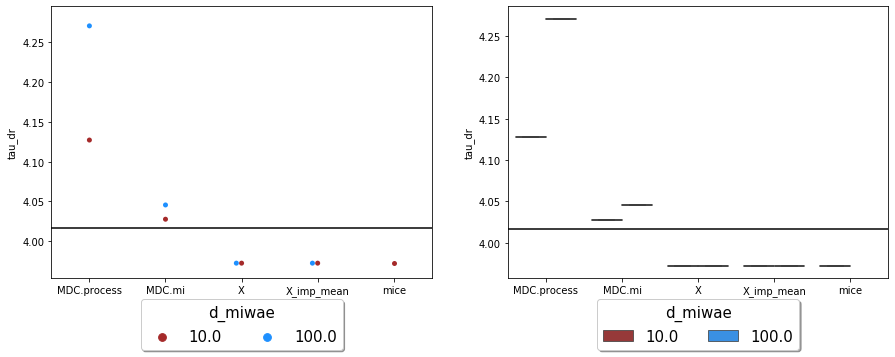

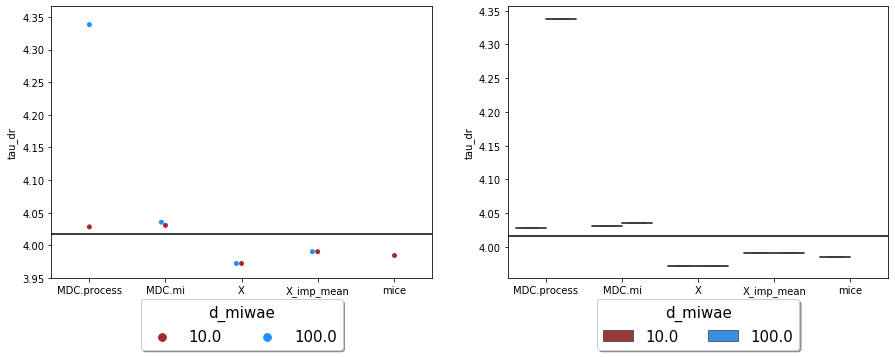

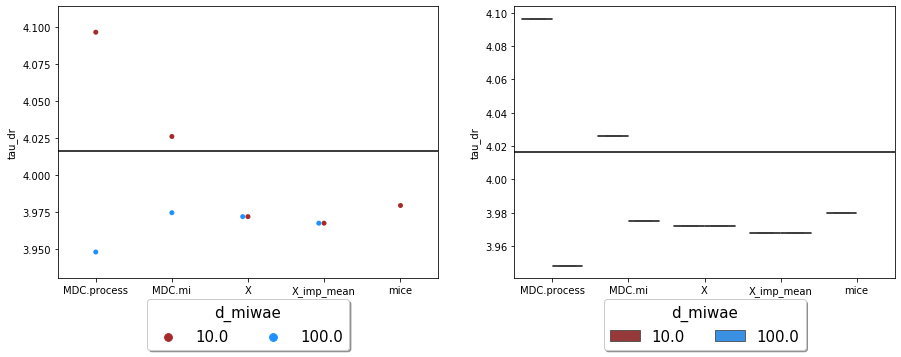

In [126]:
set_id = 1
for prop_miss in [0,0.1,0.3]:
    print('Proportion of missing values:',prop_miss)
    if save_plots:
        boxplot_with_baseline(df.loc[(df['set_id'] == set_id) & (df['add_wy'] == False) & (df['n_epochs'] == 10) & (df['sig_prior']==0.1) & (df['prop_miss'] == prop_miss)],
                              df_mice_results = df_mice, loss = loss,
                              baseline = get_ihdp_baseline,
                              hue = 'd_miwae', palette=['brown','dodgerblue'], save_plot = 'varyingP.pdf',
                              ground_truth = gt)
    else:
        boxplot_with_baseline(df.loc[(df['set_id'] == set_id) & (df['add_wy'] == False) & (df['n_epochs'] == 10) & (df['sig_prior']==0.1) & (df['prop_miss'] == prop_miss)],
                          df_mice_results = df_mice, loss = loss,
                          baseline = get_ihdp_baseline,
                          hue = 'd_miwae', palette=['brown','dodgerblue'],
                          ground_truth = gt)

## Medium prior variance

Proportion of missing values: 0
best_params= {'d_miwae': 10, 'prop_miss': 0.0, 'method': 'glm', 'set_id': 1, 'add_wy': False, 'n_epochs': 10, 'sig_prior': 1.0}
best_params= {'d_miwae': 100, 'prop_miss': 0.0, 'method': 'glm', 'set_id': 1, 'add_wy': False, 'n_epochs': 10, 'sig_prior': 1.0}
Proportion of missing values: 0.1
best_params= {'d_miwae': 10, 'prop_miss': 0.1, 'method': 'glm', 'set_id': 1, 'add_wy': False, 'n_epochs': 10, 'sig_prior': 1.0}
best_params= {'d_miwae': 100, 'prop_miss': 0.1, 'method': 'glm', 'set_id': 1, 'add_wy': False, 'n_epochs': 10, 'sig_prior': 1.0}
Proportion of missing values: 0.3
best_params= {'d_miwae': 10, 'prop_miss': 0.3, 'method': 'glm', 'set_id': 1, 'add_wy': False, 'n_epochs': 10, 'sig_prior': 1.0}
best_params= {'d_miwae': 100, 'prop_miss': 0.3, 'method': 'glm', 'set_id': 1, 'add_wy': False, 'n_epochs': 10, 'sig_prior': 1.0}


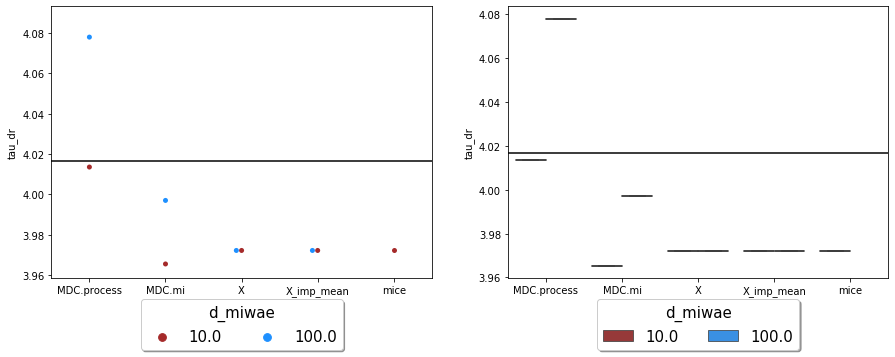

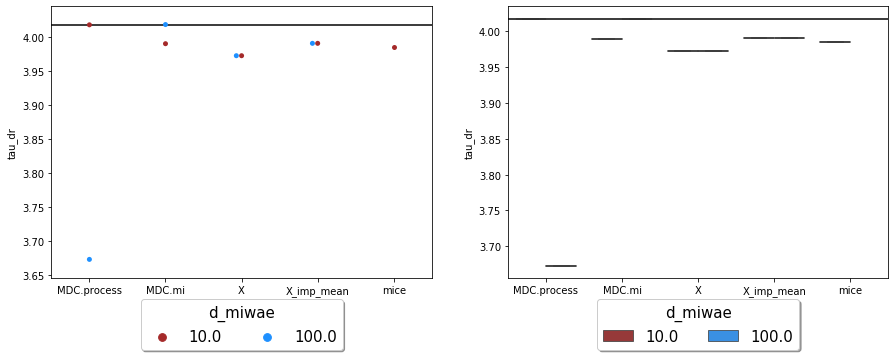

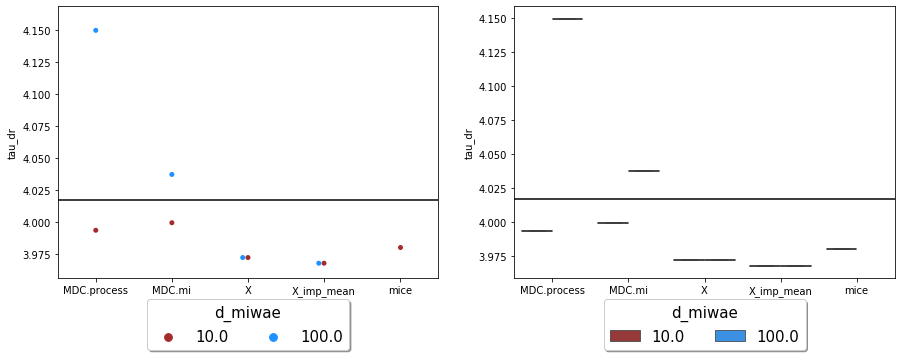

In [128]:
set_id = 1
for prop_miss in [0,0.1,0.3]:
    print('Proportion of missing values:',prop_miss)
    if save_plots:
        boxplot_with_baseline(df.loc[(df['set_id'] == set_id) & (df['add_wy'] == False) & (df['n_epochs'] == 10) & (df['sig_prior']==1) & (df['prop_miss'] == prop_miss)],
                              df_mice_results = df_mice, loss = loss,
                              baseline = get_ihdp_baseline,
                              hue = 'd_miwae', palette=['brown','dodgerblue'], save_plot = 'varyingP.pdf',
                              ground_truth = gt)
    else:
        boxplot_with_baseline(df.loc[(df['set_id'] == set_id) & (df['add_wy'] == False) & (df['n_epochs'] == 10) & (df['sig_prior']==1) & (df['prop_miss'] == prop_miss)],
                          df_mice_results = df_mice, loss = loss,
                          baseline = get_ihdp_baseline,
                          hue = 'd_miwae', palette=['brown','dodgerblue'],
                          ground_truth = gt)

## Large prior variance

Proportion of missing values: 0
best_params= {'d_miwae': 10, 'prop_miss': 0.0, 'method': 'glm', 'set_id': 1, 'add_wy': False, 'n_epochs': 10, 'sig_prior': 10.0}
best_params= {'d_miwae': 100, 'prop_miss': 0.0, 'method': 'glm', 'set_id': 1, 'add_wy': False, 'n_epochs': 10, 'sig_prior': 10.0}


/Users/imke_mayer/Documents/TraumaMatrix/CausalInference/Simulations/miss-vae/baseline.py:94: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  tt[hue] = param_hue


Proportion of missing values: 0.1
best_params= {'d_miwae': 10, 'prop_miss': 0.1, 'method': 'glm', 'set_id': 1, 'add_wy': False, 'n_epochs': 10, 'sig_prior': 10.0}
best_params= {'d_miwae': 100, 'prop_miss': 0.1, 'method': 'glm', 'set_id': 1, 'add_wy': False, 'n_epochs': 10, 'sig_prior': 10.0}


/Users/imke_mayer/Documents/TraumaMatrix/CausalInference/Simulations/miss-vae/baseline.py:94: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  tt[hue] = param_hue


Proportion of missing values: 0.3
best_params= {'d_miwae': 10, 'prop_miss': 0.3, 'method': 'glm', 'set_id': 1, 'add_wy': False, 'n_epochs': 10, 'sig_prior': 10.0}
best_params= {'d_miwae': 100, 'prop_miss': 0.3, 'method': 'glm', 'set_id': 1, 'add_wy': False, 'n_epochs': 10, 'sig_prior': 10.0}


/Users/imke_mayer/Documents/TraumaMatrix/CausalInference/Simulations/miss-vae/baseline.py:94: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  tt[hue] = param_hue


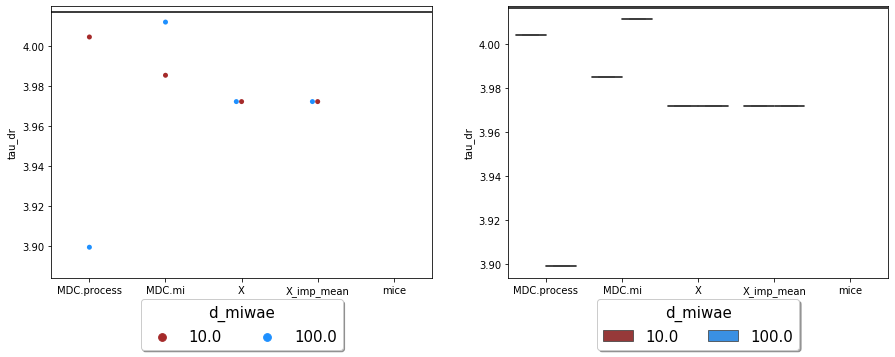

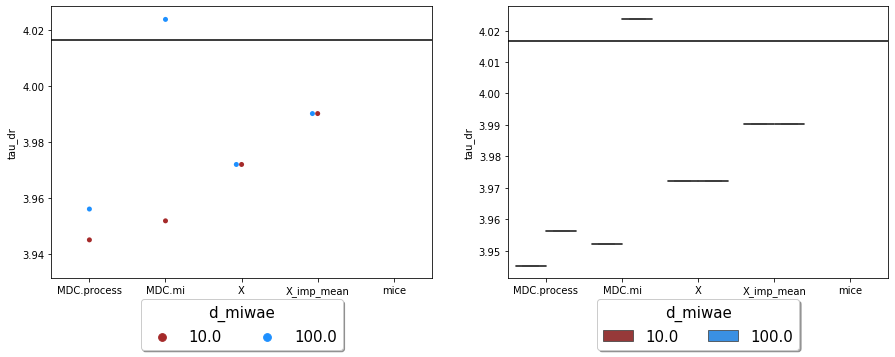

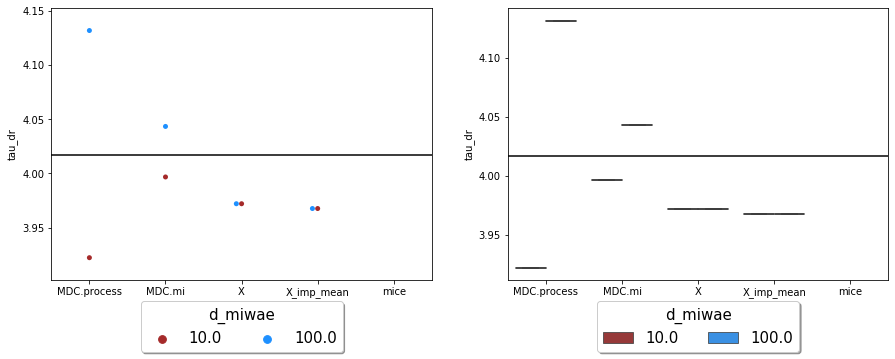

In [130]:
set_id = 1
for prop_miss in [0,0.1,0.3]:
    print('Proportion of missing values:',prop_miss)
    if save_plots:
        boxplot_with_baseline(df.loc[(df['set_id'] == set_id) & (df['add_wy'] == False) & (df['n_epochs'] == 10) & (df['sig_prior']==10) & (df['prop_miss'] == prop_miss)],
                              df_mice_results = df_mice, loss = loss,
                              baseline = get_ihdp_baseline,
                              hue = 'd_miwae', palette=['brown','dodgerblue'], save_plot = 'varyingP.pdf',
                              ground_truth = gt)
    else:
        boxplot_with_baseline(df.loc[(df['set_id'] == set_id) & (df['add_wy'] == False) & (df['n_epochs'] == 10) & (df['sig_prior']==10) & (df['prop_miss'] == prop_miss)],
                          df_mice_results = df_mice, loss = loss,
                          baseline = get_ihdp_baseline,
                          hue = 'd_miwae', palette=['brown','dodgerblue'],
                          ground_truth = gt)


## Number of epochs

Proportion of missing values: 0.3
best_params= {'sig_prior': 0.1, 'citcio': False, 'prop_miss': 0.1, 'd_miwae': 3, 'model': 'dlvm', 'method': 'glm', 'd': 3, 'add_wy': False, 'p': 5, 'n_epochs': 10, 'n': 1000}
best_params= {'sig_prior': 0.1, 'citcio': False, 'prop_miss': 0.1, 'd_miwae': 3, 'model': 'dlvm', 'method': 'glm', 'd': 3, 'add_wy': False, 'p': 5, 'n_epochs': 400, 'n': 1000}
[False, 0.1, 'dlvm', 'glm', 5, 1000]
['citcio', 'prop_miss', 'model', 'method', 'p', 'n']
Proportion of missing values: 0.3
best_params= {'sig_prior': 0.1, 'citcio': False, 'prop_miss': 0.1, 'd_miwae': 3, 'model': 'dlvm', 'method': 'glm', 'd': 3, 'add_wy': False, 'p': 100, 'n_epochs': 10, 'n': 1000}
best_params= {'sig_prior': 0.1, 'citcio': False, 'prop_miss': 0.1, 'd_miwae': 3, 'model': 'dlvm', 'method': 'glm', 'd': 3, 'add_wy': False, 'p': 100, 'n_epochs': 400, 'n': 1000}
[False, 0.1, 'dlvm', 'glm', 100, 1000]
['citcio', 'prop_miss', 'model', 'method', 'p', 'n']


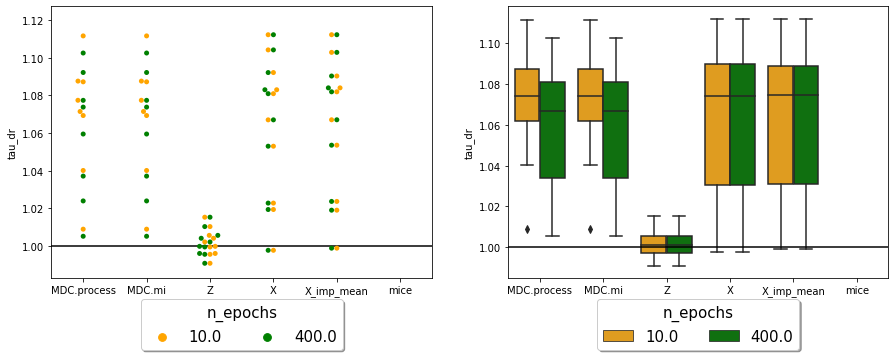

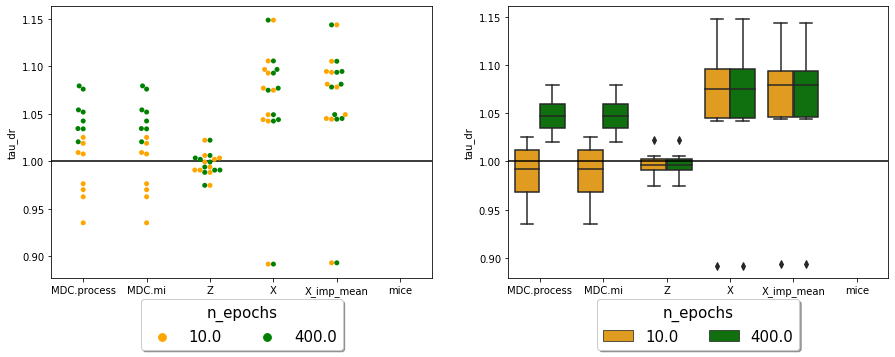

In [749]:
for p in [5, 100]:
    print('Proportion of missing values:',prop_miss)
    if save_plots:
        boxplot_with_baseline(df.loc[(df['add_wy'] == False) & (df['citcio'] == False) & (df['prop_miss']==0.1) & (df['sig_prior']==0.1) & (df['p'] == p)], 
                              df_mice_results = df_mice, loss = loss,
                              hue = 'n_epochs', palette=['orange','green'], save_plot = 'varyingN_epochs.pdf')
    else: 
        boxplot_with_baseline(df.loc[(df['add_wy'] == False) & (df['citcio'] == False) & (df['prop_miss']==0.1) & (df['sig_prior']==0.1) & (df['p'] == p)], 
                          df_mice_results = df_mice, loss = loss,
                          hue = 'n_epochs', palette=['orange','green'])


Proportion of missing values: 0.3
best_params= {'sig_prior': 0.1, 'citcio': True, 'prop_miss': 0.1, 'd_miwae': 3, 'model': 'dlvm', 'method': 'glm', 'd': 3, 'p': 5, 'n_epochs': 10, 'n': 1000}
best_params= {'sig_prior': 0.1, 'citcio': True, 'prop_miss': 0.1, 'd_miwae': 3, 'model': 'dlvm', 'method': 'glm', 'd': 3, 'p': 5, 'n_epochs': 400, 'n': 1000}
Proportion of missing values: 0.3
best_params= {'sig_prior': 0.1, 'citcio': True, 'prop_miss': 0.1, 'd_miwae': 3, 'model': 'dlvm', 'method': 'glm', 'd': 3, 'p': 100, 'n_epochs': 10, 'n': 1000}
best_params= {'sig_prior': 0.1, 'citcio': True, 'prop_miss': 0.1, 'd_miwae': 3, 'model': 'dlvm', 'method': 'glm', 'd': 3, 'p': 100, 'n_epochs': 400, 'n': 1000}


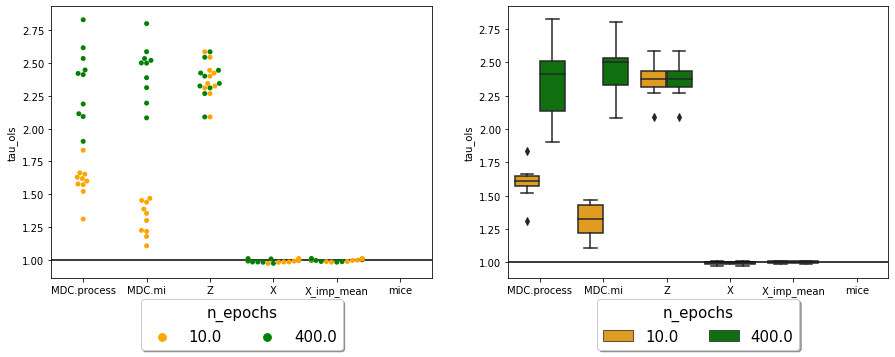

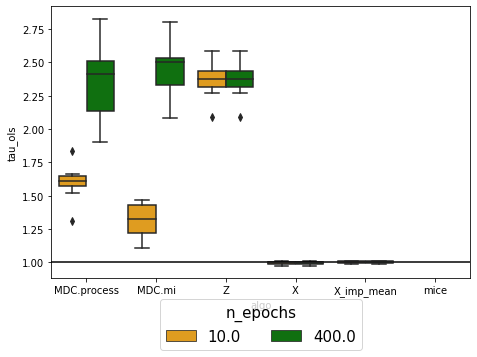

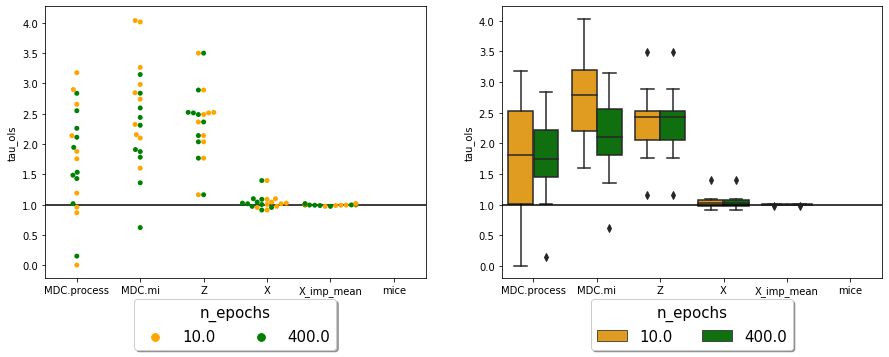

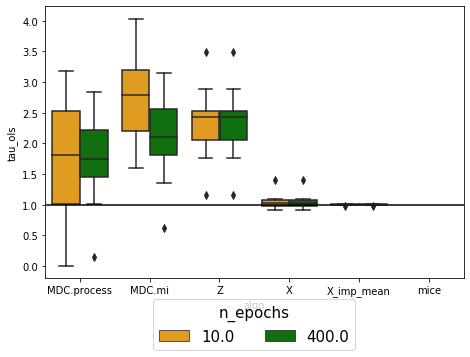

In [618]:
for p in [5, 100]:
    print('Proportion of missing values:',prop_miss)
    if save_plots:
        boxplot_with_baseline(df.loc[(df['add_wy'] == False) & (df['citcio'] == True) & (df['prop_miss']==0.1) & (df['sig_prior']==0.1) & (df['p'] == p)], 
                              df_mice_results = df_mice, loss = loss,
                              hue = 'n_epochs', palette=['orange','green'], save_plot = 'varyingN_epochs.pdf')
    else:
        boxplot_with_baseline(df.loc[(df['add_wy'] == False) & (df['citcio'] == True) & (df['prop_miss']==0.1) & (df['sig_prior']==0.1) & (df['p'] == p)], 
                          df_mice_results = df_mice, loss = loss,
                          hue = 'n_epochs', palette=['orange','green'])


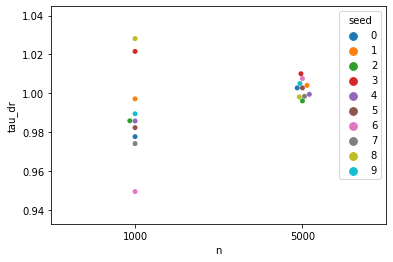

In [644]:
df_ = df_mice
df_ = df_.loc[df_['p']==100]
df_ = df_.loc[df_['prop_miss']==.1]
df_ = df_.loc[df_['model']=='lrmf']
df_ = df_.loc[df_['citcio']==False]
sns.swarmplot(x="n", y=loss,hue="seed", data=df_)

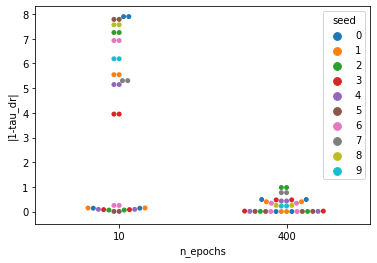

In [265]:
df_ = df
# df_ = df_.loc[df_['n_epochs']==400]
df_ = df_.loc[df_['p']==100]
df_ = df_.loc[df_['prop_miss']==.1]
df_ = df_.loc[df_['model']=='lrmf']
df_ = df_.loc[df_['sig_prior']==.1]
sns.swarmplot(x="n_epochs", y=loss,hue="seed", data=df_)

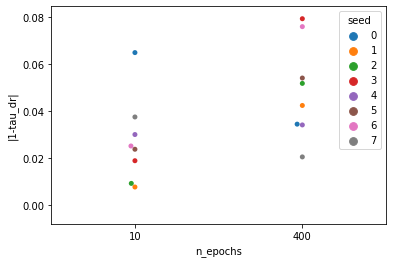

In [83]:
df_ = df
# df_ = df_.loc[df_['n_epochs']==400]
df_ = df_.loc[df_['p']==100]
df_ = df_.loc[df_['prop_miss']==.1]
df_ = df_.loc[df_['model']=='dlvm']
df_ = df_.loc[df_['sig_prior']==.1]
df_ = df_.loc[df_['citcio'] == False]
sns.swarmplot(x="n_epochs", y=loss,hue="seed", data=df_)

best_params= {'sig_prior': 0.1, 'd_miwae': 3, 'model': 'dlvm', 'method': 'glm', 'prop_miss': 0.1, 'time': 78, 'n_epochs': 10, 'p': 100, 'n': 1000, 'd': 3, 'citcio': False}


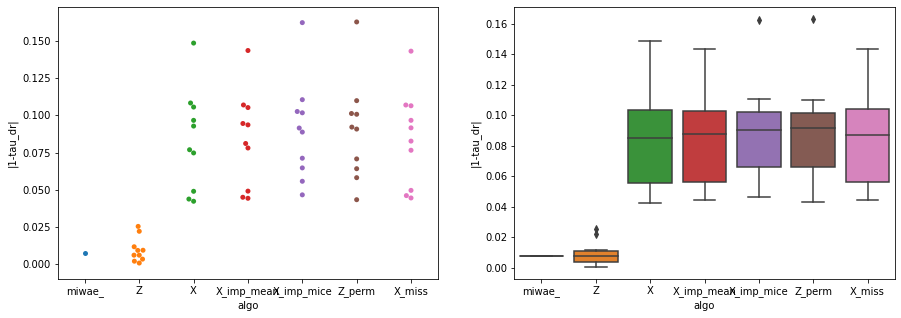

In [84]:
boxplot_with_baseline(df_, loss = loss)

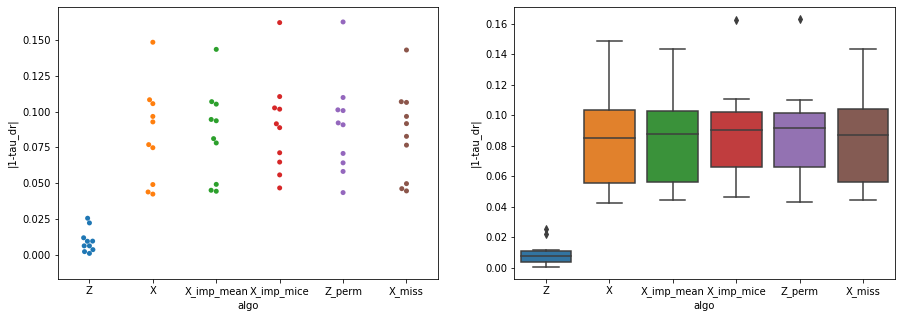

In [85]:
df_base = get_baseline(model="dlvm", show=True, loss = loss)

In [ ]:
df_base_lrmf = get_baseline(model="lrmf", show=True, loss = loss)

In [ ]:
correlation_tau(df)

In [ ]:
#sns.pairplot(df[l_tau])

### Looking only at DLVM data results

In [ ]:
best_params, df_best = get_best_params(df.loc[df['model']=='dlvm'], loss = loss)

In [ ]:
boxplot_with_baseline(df_best, loss = loss)

In [ ]:
df_ = df
# df_ = df_.loc[df_['n_epochs']==400]
#df_ = df_.loc[df_['p']==100]
df_ = df_.loc[df_['prop_miss']==.3]
df_ = df_.loc[df_['model']=='dlvm']
df_ = df_.loc[df_['sig_prior']==0.1]
df_ = df_.loc[df_['n_epochs']==10]
sns.swarmplot(x="p", y=loss,hue="seed", data=df_)

In [ ]:
df_ = df
# df_ = df_.loc[df_['n_epochs']==400]
df_ = df_.loc[df_['p']==100]
df_ = df_.loc[df_['prop_miss']==.3]
df_ = df_.loc[df_['model']=='dlvm']
df_ = df_.loc[df_['sig_prior']==0.1]
sns.swarmplot(x="n_epochs", y=loss,hue="seed", data=df_)

#### Prop_miss = 0.1, small variance prior

In [ ]:
df_ = df
df_ = df_.loc[df_['n_epochs']==10]
df_ = df_.loc[df_['p']==100]
df_ = df_.loc[df_['prop_miss']==.1]
df_ = df_.loc[df_['model']=='dlvm']
df_ = df_.loc[df_['sig_prior']==.1]

boxplot_with_baseline(df_, loss = loss)

#### Prop_miss = 0.3, small variance prior

In [ ]:
df_ = df
df_ = df_.loc[df_['n_epochs']==10]
df_ = df_.loc[df_['p']==100]
df_ = df_.loc[df_['prop_miss']==.3]
df_ = df_.loc[df_['model']=='dlvm']
df_ = df_.loc[df_['sig_prior']==.1]

boxplot_with_baseline(df_, loss = loss)

#### Prop_miss = 0.1, large variance prior

In [ ]:
df_ = df
df_ = df_.loc[df_['n_epochs']==10]
df_ = df_.loc[df_['p']==100]
df_ = df_.loc[df_['prop_miss']==.1]
df_ = df_.loc[df_['model']=='dlvm']
df_ = df_.loc[df_['sig_prior']==10]

boxplot_with_baseline(df_, loss = loss)

#### Prop_miss = 0.3, large variance prior

In [ ]:
df_ = df
df_ = df_.loc[df_['n_epochs']==10]
df_ = df_.loc[df_['p']==100]
df_ = df_.loc[df_['prop_miss']==.3]
df_ = df_.loc[df_['model']=='dlvm']
df_ = df_.loc[df_['sig_prior']==10]

boxplot_with_baseline(df_, loss = loss)

### Interaction of parameters `p` and `sig_prior`

In [ ]:
df_ = df
#df_ = df_.loc[df_['p']==100]
df_ = df_.loc[df_['prop_miss']==.3]
df_ = df_.loc[df_['model']=='dlvm']
#df_ = df_.loc[df_['sig_prior']==0.1]
df_ = df_.loc[df_['n_epochs']==10]

#df_ = df_.groupby(['sig_prior','p']).mean()
#df_ = df_.reset_index(level=['sig_prior','p'])
sns.swarmplot(x="sig_prior", y=loss,hue="p", data=df_)

In [ ]:
df_ = df
#df_ = df_.loc[df_['p']==100]
df_ = df_.loc[df_['prop_miss']==.3]
df_ = df_.loc[df_['model']=='dlvm']
#df_ = df_.loc[df_['sig_prior']==0.1]
df_ = df_.loc[df_['n_epochs']==10]

df_ = df_.groupby(['sig_prior','p']).mean()
df_ = df_.reset_index(level=['sig_prior','p'])
sns.swarmplot(x="sig_prior", y=loss,hue="p", data=df_)

## CITCIO = True

### LRMF

In [30]:
best_params, df_best = get_best_params(df.loc[(df['model']=='lrmf') & (df['citcio'])], loss = loss)

best_params= {'sig_prior': 1.0, 'd_miwae': 3, 'model': 'lrmf', 'method': 'glm', 'prop_miss': 0.0, 'time': 136, 'n_epochs': 602, 'p': 100, 'n': 1000, 'd': 3, 'citcio': True}


In [54]:
boxplot_with_baseline(df_best, loss = loss)

best_params= {'sig_prior': 1.0, 'd_miwae': 3, 'model': 'lrmf', 'method': 'glm', 'prop_miss': 0.0, 'time': 136, 'n_epochs': 602, 'p': 100, 'n': 1000, 'd': 3, 'citcio': True}


/Users/imke_mayer/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/Users/imke_mayer/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


KeyboardInterrupt: 